In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("mnist_train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Columns: 785 entries, 5 to 0.617
dtypes: int64(785)
memory usage: 359.3 MB


In [2]:
#1st column label , rest of the row is data
784/28

28.0

In [3]:
# integer , reshaping each row into 28x28 data

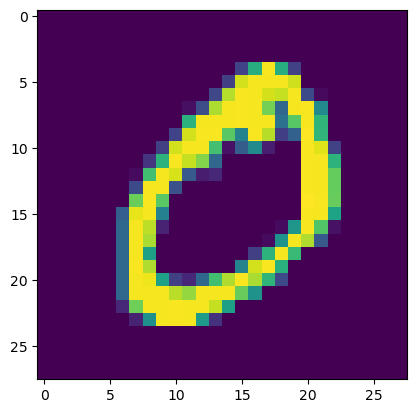

In [4]:
data = train[train.columns[1:]]

label = train[train.columns[0]]

data = data.values.reshape(-1,28,28)
plt.imshow(data[0])

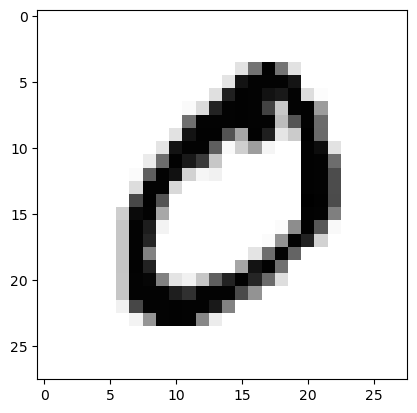

In [8]:
plt.imshow(data[0],cmap = 'Greys')

In [7]:
# preprocess data to convert 28x28 to 14x14 for better performance


In [ ]:
# Neural network with a single hidden layer
# input layer contains 784 = 28x28 nodes
# number of nodes in hidden layer = n (to be experimented)
# output layer contains 10 nodes for each numbers(0to 9)

In [7]:
import numpy as np

def sigmoid(z):
    return 1/(1+np.exp(-z))
    
class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learningrate = learning_rate
        
        self.Winput_hidden = pd.DataFrame(np.random.randn(hidden_nodes,input_nodes))
        self.Whidden_output = pd.DataFrame(np.random.randn(output_nodes,hidden_nodes))
    
    def feedforward(self,data):
        Xhiddenop = sigmoid(pd.dot(self.Winput_hidden,data))
        Xfinalop = sigmoid(pd.dot(self.hidden_output,Xhiddenop))
        pass
    
    def GradientDescent():
        pass
    
    
    def backprop():
        pass
    
    

array([[0.92527755, 0.10465849],
       [0.07654007, 0.60565699]])